In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [31]:
housing = pd.read_csv('C:/Users/HP/Downloads/DS/04-Predictive Analytics I/Linear Regression/Multiple Linear Regression in Python/Housing.csv')
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [32]:
housing.shape

(545, 13)

In [33]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
price               545 non-null int64
area                545 non-null int64
bedrooms            545 non-null int64
bathrooms           545 non-null int64
stories             545 non-null int64
mainroad            545 non-null object
guestroom           545 non-null object
basement            545 non-null object
hotwaterheating     545 non-null object
airconditioning     545 non-null object
parking             545 non-null int64
prefarea            545 non-null object
furnishingstatus    545 non-null object
dtypes: int64(6), object(7)
memory usage: 55.4+ KB


In [34]:
housing.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [35]:
housing.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

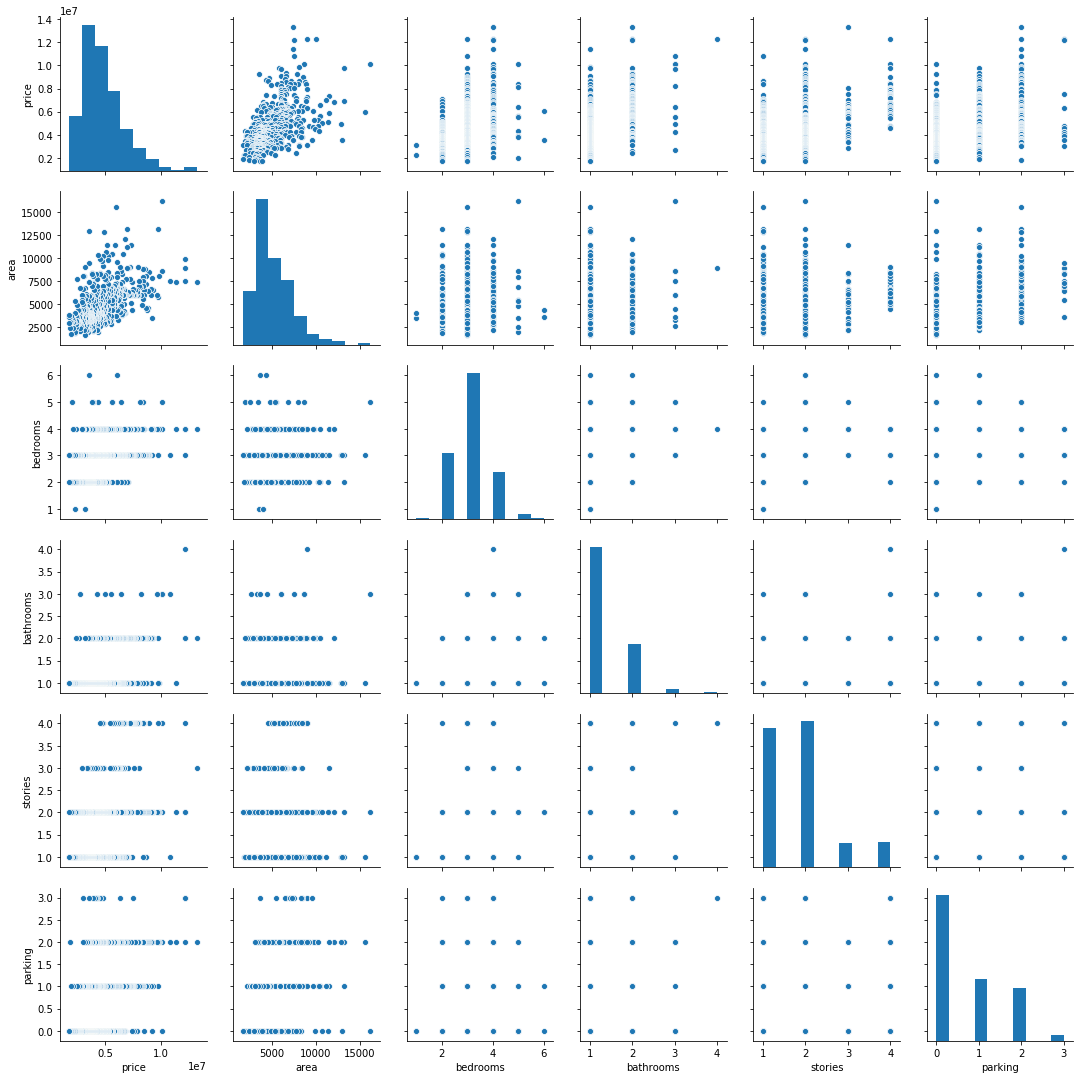

In [36]:
sns.pairplot(housing)
plt.show()

In [37]:
housing.corr()

,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


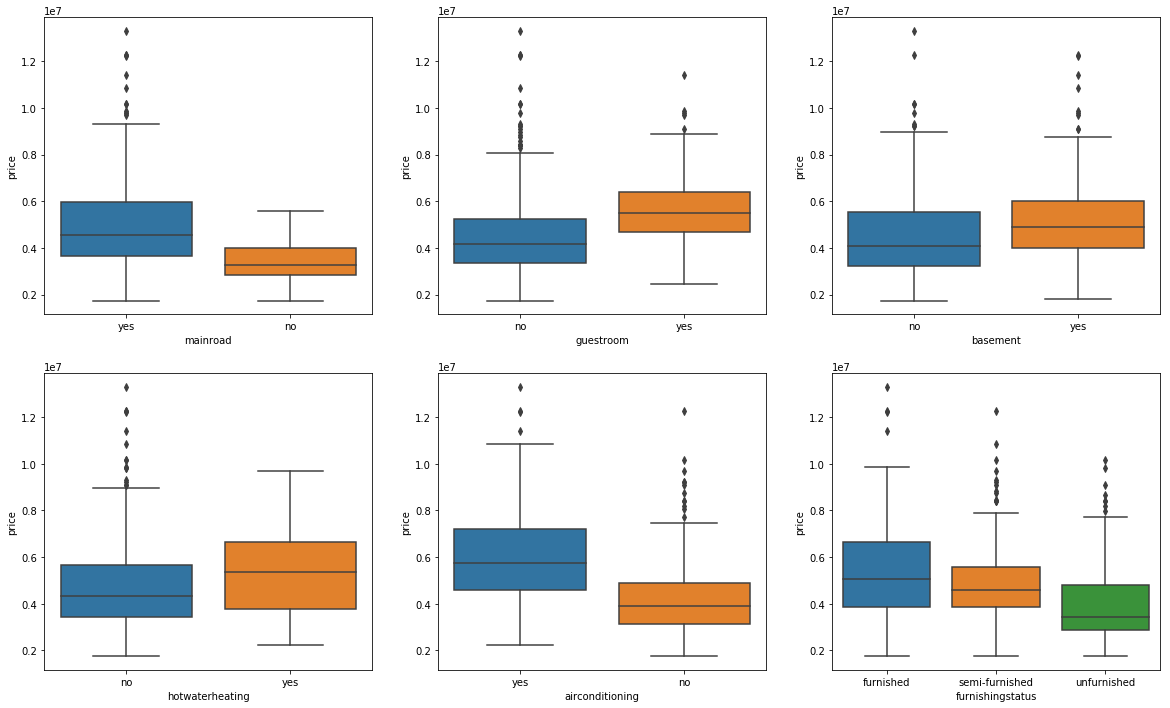

In [38]:
plt.figure(figsize=(20,12))

plt.subplot(2,3,1)
sns.boxplot(x='mainroad', y='price', data=housing)

plt.subplot(2,3,2)
sns.boxplot(x='guestroom', y='price', data=housing)

plt.subplot(2,3,3)
sns.boxplot(x='basement', y='price', data=housing)

plt.subplot(2,3,4)
sns.boxplot(x='hotwaterheating', y='price', data=housing)

plt.subplot(2,3,5)
sns.boxplot(x='airconditioning', y='price', data=housing)

plt.subplot(2,3,6)
sns.boxplot(x='furnishingstatus', y='price', data=housing)

plt.show()

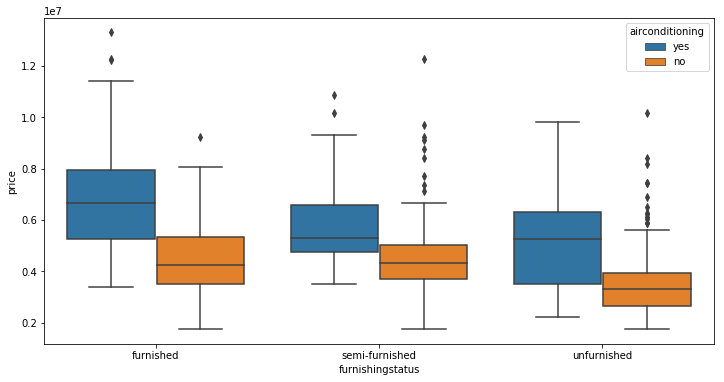

In [39]:
plt.figure(figsize=(12,6))
sns.boxplot(x='furnishingstatus', y='price', hue='airconditioning', data=housing)
plt.show()

In [40]:
varlist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

housing[varlist] = housing[varlist].apply(lambda x: x.map({'yes': 1, 'no': 0}))

In [41]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [42]:
status = pd.get_dummies(housing['furnishingstatus'], drop_first=True)
status.head()

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


In [43]:
housing = pd.concat([housing, status], axis=1)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0


In [44]:
housing.drop(['furnishingstatus'], axis=1, inplace=True)

In [45]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


In [46]:
from sklearn.model_selection import train_test_split

In [47]:
df_train, df_test = train_test_split(housing, train_size=0.7, test_size=0.3, random_state=100)

In [48]:
from sklearn.preprocessing import MinMaxScaler

In [49]:
scaler = MinMaxScaler()

In [53]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,0.169697,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,1
19,0.615152,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,1,0
159,0.321212,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,0,0
35,0.548133,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0,0
28,0.575758,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,0,1


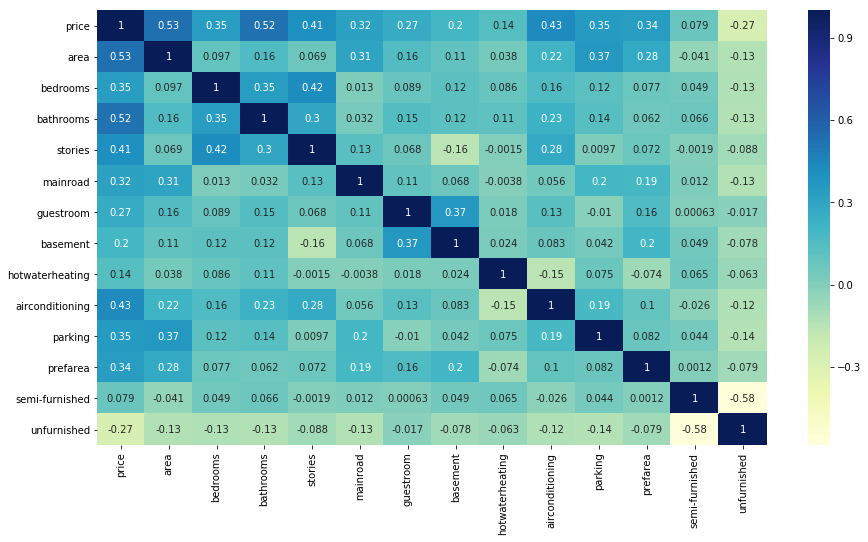

In [60]:
plt.figure(figsize=(15,8))
sns.heatmap(df_train.corr(), annot=True, cmap="YlGnBu")
plt.show()

In [61]:
X_train = df_train
Y_train = df_train.pop('price')

In [62]:
X_train.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,1
19,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,1,0
159,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,0,0
35,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0,0
28,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,0,1


In [63]:
Y_train.head()

359    0.169697
19     0.615152
159    0.321212
35     0.548133
28     0.575758
Name: price, dtype: float64

In [65]:
import statsmodels.api as sm

X_train_lm = sm.add_constant(X_train['area'])
lr = sm.OLS(Y_train, X_train_lm).fit()

In [68]:
lr.params

const    0.126894
area     0.462192
dtype: float64

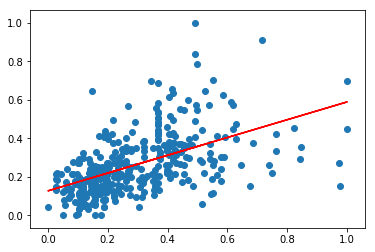

In [72]:
plt.scatter(X_train_lm['area'], Y_train)
plt.plot(X_train_lm, 0.126894 + 0.462192 * X_train_lm, 'r')
plt.show()

In [76]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     149.6
Date:                Thu, 22 Jul 2021   Prob (F-statistic):           3.15e-29
Time:                        22:00:41   Log-Likelihood:                 227.23
No. Observations:                 381   AIC:                            -450.5
Df Residuals:                     379   BIC:                            -442.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1269      0.013      9.853      0.0

In [80]:
X_train_lm = sm.add_constant(X_train[['area','bathrooms']])

In [82]:
lr = sm.OLS(Y_train, X_train_lm).fit()

In [83]:
lr.params

const        0.104589
area         0.398396
bathrooms    0.298374
dtype: float64

In [85]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     174.1
Date:                Thu, 22 Jul 2021   Prob (F-statistic):           2.51e-54
Time:                        22:05:00   Log-Likelihood:                 288.24
No. Observations:                 381   AIC:                            -570.5
Df Residuals:                     378   BIC:                            -558.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1046      0.011      9.384      0.0

In [89]:
X_train_lm = sm.add_constant(X_train[['area', 'bathrooms','bedrooms']])

lr = sm.OLS(Y_train, X_train_lm).fit()

In [90]:
lr.params

const        0.041352
area         0.392211
bathrooms    0.259978
bedrooms     0.181863
dtype: float64

In [91]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     128.2
Date:                Thu, 22 Jul 2021   Prob (F-statistic):           3.12e-57
Time:                        22:48:50   Log-Likelihood:                 297.76
No. Observations:                 381   AIC:                            -587.5
Df Residuals:                     377   BIC:                            -571.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0414      0.018      2.292      0.0

In [95]:
X_train.columns

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'semi-furnished', 'unfurnished'],
      dtype='object')

In [96]:
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(Y_train, X_train_lm).fit()

In [97]:
lr_1.params

const              0.020033
area               0.234664
bedrooms           0.046735
bathrooms          0.190823
stories            0.108516
mainroad           0.050441
guestroom          0.030428
basement           0.021595
hotwaterheating    0.084863
airconditioning    0.066881
parking            0.060735
prefarea           0.059428
semi-furnished     0.000921
unfurnished       -0.031006
dtype: float64

In [98]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     60.40
Date:                Thu, 22 Jul 2021   Prob (F-statistic):           8.83e-83
Time:                        22:59:25   Log-Likelihood:                 381.79
No. Observations:                 381   AIC:                            -735.6
Df Residuals:                     367   BIC:                            -680.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0200      0.021     

In [99]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [100]:
vif = pd.DataFrame()

In [106]:
vif['Features'] = X_train.columns

In [108]:
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

In [110]:
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
1,bedrooms,7.33
4,mainroad,6.02
0,area,4.67
3,stories,2.70
11,semi-furnished,2.19
9,parking,2.12
6,basement,2.02
12,unfurnished,1.82
8,airconditioning,1.77
2,bathrooms,1.67


In [111]:
X_train.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,1
19,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,1,0
159,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,0,0
35,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0,0
28,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,0,1


In [112]:
X_train_lm = sm.add_constant(X_train.drop('semi-furnished', axis=1))

lr_2 = sm.OLS(Y_train, X_train_lm).fit()

In [113]:
lr_2.params

const              0.020740
area               0.234404
bedrooms           0.046710
bathrooms          0.190876
stories            0.108475
mainroad           0.050401
guestroom          0.030447
basement           0.021605
hotwaterheating    0.084890
airconditioning    0.066803
parking            0.060761
prefarea           0.059419
unfurnished       -0.031594
dtype: float64

In [115]:
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     65.61
Date:                Thu, 22 Jul 2021   Prob (F-statistic):           1.07e-83
Time:                        23:07:29   Log-Likelihood:                 381.79
No. Observations:                 381   AIC:                            -737.6
Df Residuals:                     368   BIC:                            -686.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0207      0.019     

In [116]:
X_train_lm = sm.add_constant(X_train.drop('bedrooms', axis=1))

lr_3 = sm.OLS(Y_train, X_train_lm).fit()

In [118]:
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     65.20
Date:                Thu, 22 Jul 2021   Prob (F-statistic):           2.35e-83
Time:                        23:09:49   Log-Likelihood:                 380.96
No. Observations:                 381   AIC:                            -735.9
Df Residuals:                     368   BIC:                            -684.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0351      0.017     

In [126]:
X = X_train.drop(['semi-furnished','bedrooms','basement'], axis=1)

X_train_lm = sm.add_constant(X)
lr_4 = sm.OLS(Y_train, X_train_lm).fit()

In [127]:
lr_4.params

const              0.042792
area               0.233517
bathrooms          0.201857
stories            0.108139
mainroad           0.049672
guestroom          0.040198
hotwaterheating    0.087618
airconditioning    0.068221
parking            0.062854
prefarea           0.063745
unfurnished       -0.033699
dtype: float64

In [128]:
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     77.18
Date:                Thu, 22 Jul 2021   Prob (F-statistic):           3.13e-84
Time:                        23:22:54   Log-Likelihood:                 378.51
No. Observations:                 381   AIC:                            -735.0
Df Residuals:                     370   BIC:                            -691.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0428      0.014     

In [134]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
3,mainroad,4.55
0,area,4.54
2,stories,2.12
7,parking,2.10
6,airconditioning,1.75
1,bathrooms,1.58
8,prefarea,1.47
9,unfurnished,1.33
4,guestroom,1.30
5,hotwaterheating,1.12


In [136]:
Y_train_pred = lr_4.predict(X_train_lm)

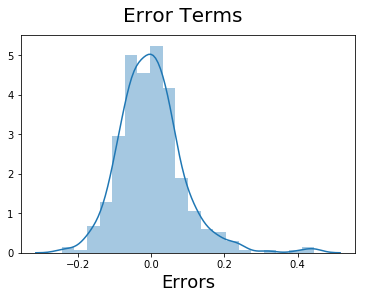

In [141]:
plt.figure()
sns.distplot(Y_train - Y_train_pred, bins=20)
plt.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()

In [143]:
df_test.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
265,4403000,2880,3,1,2,1,0,0,0,0,0,1,1,0
54,7350000,6000,3,2,2,1,1,0,0,1,1,0,1,0
171,5250000,10269,3,1,1,1,0,0,0,0,1,1,1,0
244,4550000,5320,3,1,2,1,1,1,0,0,0,1,1,0
268,4382000,4950,4,1,2,1,0,0,0,1,0,0,1,0


In [144]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [145]:
df_test.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
265,0.229697,0.091869,0.4,0.0,0.333333,1,0,0,0,0,0.000000,1,1,0
54,0.484848,0.366420,0.4,0.5,0.333333,1,1,0,0,1,0.333333,0,1,0
171,0.303030,0.742080,0.4,0.0,0.000000,1,0,0,0,0,0.333333,1,1,0
244,0.242424,0.306582,0.4,0.0,0.333333,1,1,1,0,0,0.000000,1,1,0
268,0.227879,0.274023,0.6,0.0,0.333333,1,0,0,0,1,0.000000,0,1,0


In [146]:
df_test.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,0.263176,0.298548,0.408537,0.158537,0.268293,0.865854,0.195122,0.347561,0.030488,0.353659,0.205285,0.237805,0.420732,0.329268
std,0.172077,0.211922,0.147537,0.281081,0.276007,0.341853,0.397508,0.477654,0.172452,0.479569,0.289322,0.427043,0.495189,0.471387
min,0.006061,-0.016367,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.142424,0.148011,0.400000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.226061,0.259724,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.346970,0.397439,0.400000,0.500000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,1.000000,1.000000
max,0.909091,1.263992,0.800000,1.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [147]:
X_test = df_test
Y_test = df_test.pop('price')

In [148]:
X_test_lm = sm.add_constant(X_test)

In [149]:
X_test_lm.head()

,const,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
265,1.0,0.091869,0.4,0.0,0.333333,1,0,0,0,0,0.000000,1,1,0
54,1.0,0.366420,0.4,0.5,0.333333,1,1,0,0,1,0.333333,0,1,0
171,1.0,0.742080,0.4,0.0,0.000000,1,0,0,0,0,0.333333,1,1,0
244,1.0,0.306582,0.4,0.0,0.333333,1,1,1,0,0,0.000000,1,1,0
268,1.0,0.274023,0.6,0.0,0.333333,1,0,0,0,1,0.000000,0,1,0


In [150]:
X_test_lm = X_test_lm.drop(["bedrooms", "semi-furnished", "basement"], axis=1)

In [153]:
Y_test_pred = lr_4.predict(X_test_lm)

In [154]:
Y_test_pred.head()

265    0.213709
54     0.444375
171    0.350449
244    0.304047
268    0.260721
dtype: float64

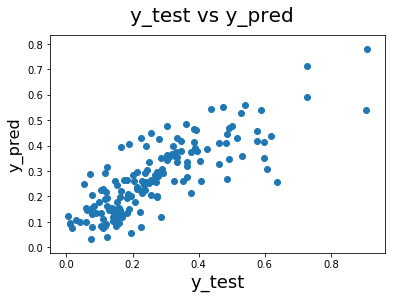

In [164]:
plt.scatter(Y_test, Y_test_pred)
#plt.plot(X_test_lm, 0.042792 + (0.236 * X_test_lm['area']) + (0.202 * X_test_lm['bathrooms']) + (0.11 * X_test_lm['stories']) + (0.05 * X_test_lm['mainroad']) + (0.04 * X_test_lm['guestroom']) + (0.0876 * X_test_lm['hotwaterheating']) + (0.0682 * X_test_lm['airconditioning']) + (0.0629 * X_test_lm['parking']) + (0.0637 * X_test_lm['prefarea']) - (0.0337 * X_test_lm['unfurnished']), 'r')
plt.suptitle('y_test vs y_pred', fontsize = 20)
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16)
plt.show()